Based on [https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html](https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html)

In [1]:
import os, sys
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import personal modules
# Path to modules
sys.path.append('../modules')
from download_SNOTEL import pull_snotel_sitecode, snotel_fetch

In [2]:
path_to_data = '/data/projects/Comet/cwp140/' 
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
## TODO read text files from `../data/*snotel.text`
## loop through all stations within subbasin
station_name = 'Arapaho Ridge'
#Daily SWE variable code
variablecode = 'SNOTEL:WTEQ_D'

#Get all records, can filter later
start_date = datetime(1950,1,1)
end_date = datetime.today().strftime('%Y-%m-%d')

sitecode = pull_snotel_sitecode(station_name)
print(sitecode)
values_df = snotel_fetch(sitecode, variablecode, start_date, end_date)
values_df.shape

SNOTEL:1030_CO_SNTL


(7882, 8)

In [5]:
values_df

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code
datetime,,,,,,,,
2002-08-14 00:00:00+00:00,0.0,E,nc,2002-08-14T00:00:00,0,0,1,1
2002-08-15 00:00:00+00:00,0.0,E,nc,2002-08-15T00:00:00,0,0,1,1
2002-08-16 00:00:00+00:00,0.0,E,nc,2002-08-16T00:00:00,0,0,1,1
2002-08-17 00:00:00+00:00,0.0,V,nc,2002-08-17T00:00:00,0,0,1,1
2002-08-18 00:00:00+00:00,0.0,V,nc,2002-08-18T00:00:00,0,0,1,1
...,...,...,...,...,...,...,...,...
2024-03-08 00:00:00+00:00,18.4,V,nc,2024-03-08T00:00:00,0,0,1,1
2024-03-09 00:00:00+00:00,18.4,V,nc,2024-03-09T00:00:00,0,0,1,1
2024-03-10 00:00:00+00:00,18.4,V,nc,2024-03-10T00:00:00,0,0,1,1


In [6]:
#Get number of decimal years between first and last observation
nyears = (values_df.index.max() - values_df.index.min()).days/365.25
nyears

21.57700205338809

<Axes: xlabel='datetime'>

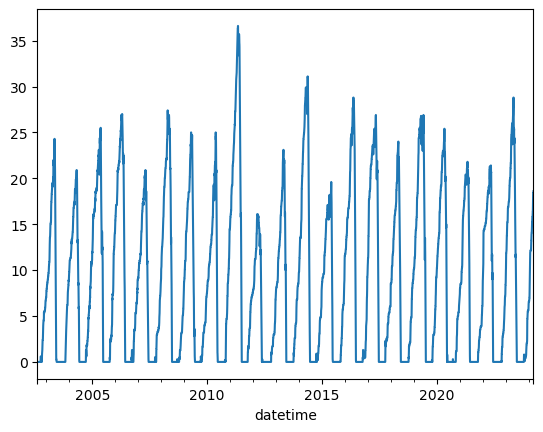

In [7]:
values_df['value'].plot()

In [8]:
values_df['SWE_diff'] = values_df['value'].diff()
values_df

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code,SWE_diff
datetime,,,,,,,,,
2002-08-14 00:00:00+00:00,0.0,E,nc,2002-08-14T00:00:00,0,0,1,1,NaN
2002-08-15 00:00:00+00:00,0.0,E,nc,2002-08-15T00:00:00,0,0,1,1,0.0
2002-08-16 00:00:00+00:00,0.0,E,nc,2002-08-16T00:00:00,0,0,1,1,0.0
2002-08-17 00:00:00+00:00,0.0,V,nc,2002-08-17T00:00:00,0,0,1,1,0.0
2002-08-18 00:00:00+00:00,0.0,V,nc,2002-08-18T00:00:00,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...
2024-03-08 00:00:00+00:00,18.4,V,nc,2024-03-08T00:00:00,0,0,1,1,0.0
2024-03-09 00:00:00+00:00,18.4,V,nc,2024-03-09T00:00:00,0,0,1,1,0.0
2024-03-10 00:00:00+00:00,18.4,V,nc,2024-03-10T00:00:00,0,0,1,1,0.0


In [12]:
## plot a time series of event we are looking at
idx = (values_df.index > '2022-10-01') & (values_df.index < '2023-09-30')
tmp = values_df.loc[idx]
tmp

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code,SWE_diff
datetime,,,,,,,,,
2022-10-02 00:00:00+00:00,0.0,E,nc,2022-10-02T00:00:00,0,0,1,1,0.0
2022-10-03 00:00:00+00:00,0.0,E,nc,2022-10-03T00:00:00,0,0,1,1,0.0
2022-10-04 00:00:00+00:00,0.0,E,nc,2022-10-04T00:00:00,0,0,1,1,0.0
2022-10-05 00:00:00+00:00,0.0,E,nc,2022-10-05T00:00:00,0,0,1,1,0.0
2022-10-06 00:00:00+00:00,0.0,E,nc,2022-10-06T00:00:00,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...
2023-09-25 00:00:00+00:00,0.0,V,nc,2023-09-25T00:00:00,0,0,1,1,0.0
2023-09-26 00:00:00+00:00,0.0,V,nc,2023-09-26T00:00:00,0,0,1,1,0.0
2023-09-27 00:00:00+00:00,0.0,V,nc,2023-09-27T00:00:00,0,0,1,1,0.0


<Axes: xlabel='datetime'>

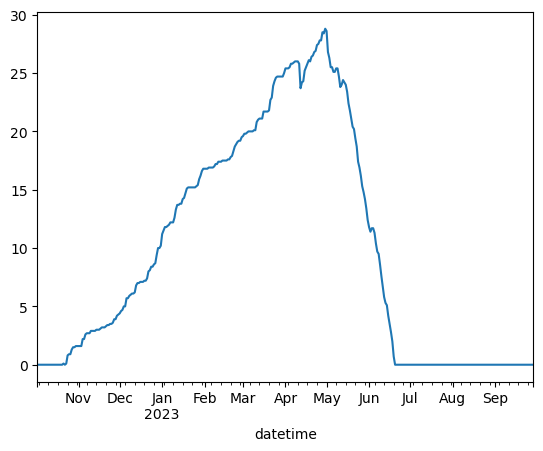

In [15]:
tmp['value'].plot()

<Axes: xlabel='datetime'>

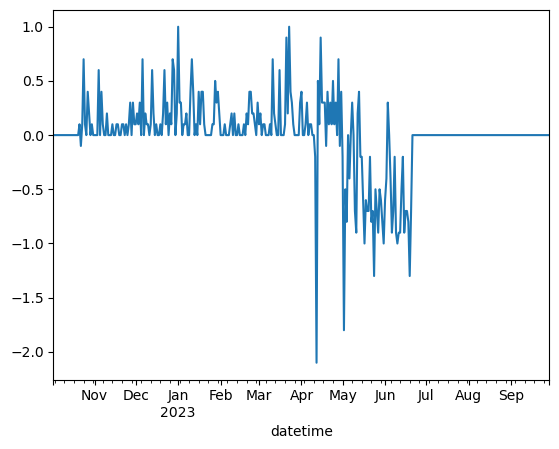

In [13]:
tmp.SWE_diff.plot()

In [16]:
SWE_thres = values_df['SWE_diff'].describe(percentiles=[.90]).loc['90%'] # 95th percentile precipitation threshold
print(SWE_thres)

0.30000000000000004


In [18]:
idx = (tmp['SWE_diff'] >= SWE_thres)
df = tmp.loc[idx]
df

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code,SWE_diff
datetime,,,,,,,,,
2022-10-24 00:00:00+00:00,0.8,V,nc,2022-10-24T00:00:00,0,0,1,1,0.7
2022-10-27 00:00:00+00:00,1.3,V,nc,2022-10-27T00:00:00,0,0,1,1,0.4
2022-11-04 00:00:00+00:00,2.2,V,nc,2022-11-04T00:00:00,0,0,1,1,0.6
2022-11-06 00:00:00+00:00,2.6,V,nc,2022-11-06T00:00:00,0,0,1,1,0.4
2022-11-29 00:00:00+00:00,4.2,V,nc,2022-11-29T00:00:00,0,0,1,1,0.3
2022-12-06 00:00:00+00:00,5.7,E,nc,2022-12-06T00:00:00,0,0,1,1,0.7
2022-12-13 00:00:00+00:00,6.8,V,nc,2022-12-13T00:00:00,0,0,1,1,0.6
2022-12-22 00:00:00+00:00,8.0,E,nc,2022-12-22T00:00:00,0,0,1,1,0.6
2022-12-24 00:00:00+00:00,8.4,V,nc,2022-12-24T00:00:00,0,0,1,1,0.3


In [19]:
len(df)

46

In [21]:
df['SWE_diff']

datetime
2022-10-24 00:00:00+00:00    0.7
2022-10-27 00:00:00+00:00    0.4
2022-11-04 00:00:00+00:00    0.6
2022-11-06 00:00:00+00:00    0.4
2022-11-29 00:00:00+00:00    0.3
2022-12-06 00:00:00+00:00    0.7
2022-12-13 00:00:00+00:00    0.6
2022-12-22 00:00:00+00:00    0.6
2022-12-24 00:00:00+00:00    0.3
2022-12-28 00:00:00+00:00    0.7
2022-12-29 00:00:00+00:00    0.6
2023-01-01 00:00:00+00:00    1.0
2023-01-02 00:00:00+00:00    0.3
2023-01-03 00:00:00+00:00    0.3
2023-01-10 00:00:00+00:00    0.4
2023-01-11 00:00:00+00:00    0.7
2023-01-12 00:00:00+00:00    0.4
2023-01-16 00:00:00+00:00    0.4
2023-01-18 00:00:00+00:00    0.4
2023-01-19 00:00:00+00:00    0.4
2023-01-28 00:00:00+00:00    0.5
2023-01-30 00:00:00+00:00    0.4
2023-02-22 00:00:00+00:00    0.4
2023-02-23 00:00:00+00:00    0.4
2023-02-28 00:00:00+00:00    0.3
2023-03-11 00:00:00+00:00    0.7
2023-03-16 00:00:00+00:00    0.6
2023-03-21 00:00:00+00:00    0.9
2023-03-23 00:00:00+00:00    1.0
2023-03-24 00:00:00+00:00    0.4
2

In [ ]:
## TODO: put into a xarray dataset
## HUC6 - One of the three focus subbasins
## Station Name - Station Name 
## start_date - date where SWE > 90th percentile
## lat - station lat
## lon - station lon
## SWE - SWE value